In [2]:
import os
import ROOT as R

Welcome to JupyROOT 6.16/00


In [3]:
R.gROOT.SetBatch(True)
R.gStyle.SetOptStat(0)
R.gStyle.SetPadRightMargin(0.05)
R.gStyle.SetPadLeftMargin(0.1)
# R.gStyle.SetPadRightMargin(0.12)
R.gROOT.ForceStyle()

In [40]:
DIR_IN = '/Users/nbartosi/Cernbox/work/mu_collider/data/digi_bkg_QGSP_BERT_HP/c0'
DIR_OUT = os.path.join(DIR_IN, 'plots')
FILE_IN = os.path.join(DIR_IN, 'sim_mod1_mumi-1e3x500-26m-lowth-excl_j1-8.root')

In [58]:
h_temp = R.TH1I('h_temp', ';time [ns];Particles', 550,-50,500)

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_temp (Potential memory leak).


In [42]:
C = R.TCanvas('canvas', '', 1000, 575)
# C = R.TCanvas('canvas', '', 1000, 700)
# C = R.TCanvas('canvas', '', 700, 800)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [59]:
file_in = R.TFile(FILE_IN)
tree = file_in.Get('MyLCTuple')

### Filling histograms

In [60]:
C.SetGridy(1)
h_draw = {}
pdgs = [22, 11, 2212, 2112, 13]
pdgs_eth = {
    22: 2e-4,
    2112: 1e-4,
    11: 2e-4,
    2212: 1e-3,
    13: 1e-3
}
# MCP selection
pdgs_sel = {pdg: 'abs(mcpdg) == {0:d} && mcene >= {1:e}'.format(pdg, pdgs_eth[pdg]) for pdg in pdgs}
pdgs_sel[2212] = 'mcpdg != 2112 && abs(mcpdg) > 22 && mcene >= {0:e}'.format(pdgs_eth[2212])
# # HIT selection
# pdgs_sel = {pdg: 'abs(mcpdg[stmcp]) == {0:d}'.format(pdg) for pdg in pdgs}
# pdgs_sel[2212] = 'mcpdg[stmcp] != 2112 && abs(mcpdg[stmcp]) > 22'
# pdgs_sel[0] = 'scene > 0.0'

h_temp.SetDirectory(R.gDirectory)
for pdg in pdgs:
    h_temp.Reset()
    nEntries = tree.Draw('mctim/10.0>>h_temp', '{0:s} && mcpa0 == -1'.format(pdgs_sel[pdg]), 'goff')
    print(pdg, nEntries)
    h_draw[pdg] = h_temp.Clone()

22 47031067
11 429387
2212 18699
2112 42685263
13 828


In [45]:
leg_names = {
    22: '#gamma',
    2112: 'n',
    11: 'e^{#pm}',
    2212: 'ch. had.',
    13: '#mu^{#pm}'
}

### Drawing time distribution

22 40
11 59
2212 100
2112 36
13 100


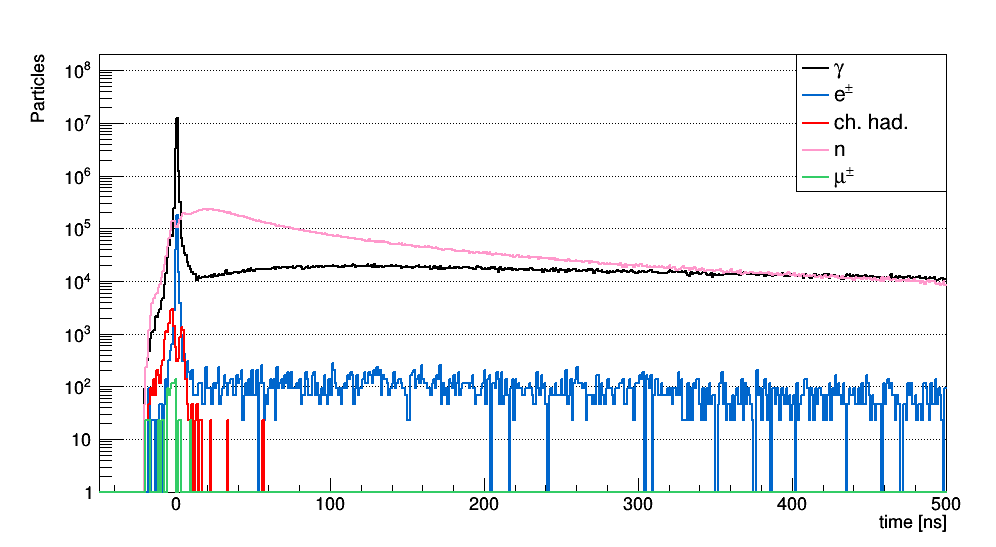

In [69]:
C.SetLogy(True)
colors = [1, R.kAzure+2, 2, R.kPink+1, R.kTeal+5]
leg = R.TLegend(0.8, 0.65, 0.95, 0.9)
leg.SetBorderSize(1)
leg.SetFillStyle(1001)
leg.SetFillColor(0)
leg_names = {
    22: '#gamma',
    2112: 'n',
    11: 'e^{#pm}',
    2212: 'ch. had.',
    13: '#mu^{#pm}'
}
for iP, pdg in enumerate(pdgs):
    drawopt = '' if iP == 0 else 'same'
    h = h_draw[pdg].Clone()
#     h.Rebin()
    R.SetOwnership(h, False)
    print(pdg, int(h.Integral(1, 150)/h.GetEntries() * 100.0))
    if iP == 0:
        h.GetYaxis().SetRangeUser(1, 2e8)
        h.GetXaxis().SetRangeUser(-50, 500)
    h.SetLineWidth(2)
    h.SetLineColor(colors[iP])
    h.Draw(drawopt)
    leg.AddEntry(h, leg_names[pdg], 'l')
leg.Draw()
C.Draw()
# C.SaveAs(os.path.join(DIR_OUT, '{0:s}_v1.pdf'.format(hname)))

### Plotting data from the MARS original file

In [53]:
FILE_IN_MARS = R.TFile('/Users/nbartosi/Cernbox/work/mu_collider/data/mumi-1e3x500-26m-lowth-excl_v1_Rndm.root')
h_temp = R.TH1I('h_temp_mars', '', 550,-30,300)
h_draw = None
for iE in range(1829):
    FILE_IN_MARS.cd('Event{0:d}'.format(iE))
    tree = R.gDirectory.Get('MCBkg')
    h_temp.SetDirectory(R.gDirectory)
    tree.Draw("TOFF*1e9>>h_temp_mars", "JJ==2")
    if h_draw is None:
        h_draw = h_temp.Clone()
    else:
        h_draw.Add(h_temp)
    print(iE, h_draw.GetEntries())

0 1975.0
1 3633.0
2 5471.0
3 7704.0
4 9444.0
5 11090.0
6 13465.0
7 15530.0
8 17350.0
9 19100.0
10 20817.0
11 21818.0
12 23828.0
13 25388.0
14 27089.0
15 28687.0
16 30737.0
17 32794.0
18 34598.0
19 36405.0
20 38298.0
21 40227.0
22 41549.0
23 43324.0
24 45182.0
25 46836.0
26 48743.0
27 50622.0
28 52647.0
29 54645.0
30 56750.0
31 58527.0
32 60304.0
33 61755.0
34 63289.0
35 65195.0
36 67396.0
37 68973.0
38 70729.0
39 72564.0
40 74250.0
41 76288.0
42 78312.0
43 80371.0
44 82080.0
45 84009.0
46 85936.0
47 87994.0
48 89841.0
49 91713.0
50 93331.0
51 95317.0
52 96957.0
53 98822.0
54 101163.0
55 103137.0
56 104836.0
57 106959.0
58 108939.0
59 111060.0
60 112767.0
61 114688.0
62 116644.0
63 118710.0
64 120824.0
65 122894.0
66 124624.0
67 126239.0
68 128032.0
69 129698.0
70 131779.0
71 133409.0
72 135356.0
73 136971.0
74 138787.0
75 140197.0
76 142436.0
77 144567.0
78 146546.0
79 148529.0
80 150321.0
81 152362.0
82 154486.0
83 156171.0
84 158366.0
85 160174.0
86 162183.0
87 164292.0
88 165920.0
8

648 1208327.0
649 1210262.0
650 1211715.0
651 1213665.0
652 1215612.0
653 1217810.0
654 1219877.0
655 1221731.0
656 1223644.0
657 1225322.0
658 1227396.0
659 1228908.0
660 1230527.0
661 1232107.0
662 1234080.0
663 1235979.0
664 1237921.0
665 1239751.0
666 1241885.0
667 1243721.0
668 1246010.0
669 1248044.0
670 1250049.0
671 1252126.0
672 1253708.0
673 1256045.0
674 1258075.0
675 1260215.0
676 1262214.0
677 1264047.0
678 1265968.0
679 1267992.0
680 1269646.0
681 1271758.0
682 1273632.0
683 1275439.0
684 1277061.0
685 1279252.0
686 1281515.0
687 1283253.0
688 1285032.0
689 1286360.0
690 1287621.0
691 1289736.0
692 1291380.0
693 1293200.0
694 1294906.0
695 1296693.0
696 1298774.0
697 1300183.0
698 1301719.0
699 1303117.0
700 1304874.0
701 1306915.0
702 1308927.0
703 1310361.0
704 1312164.0
705 1313932.0
706 1316134.0
707 1317925.0
708 1319849.0
709 1321813.0
710 1323519.0
711 1325557.0
712 1327604.0
713 1329355.0
714 1331458.0
715 1333436.0
716 1335142.0
717 1337156.0
718 1338800.0
719 13

1241 2306020.0
1242 2307669.0
1243 2309556.0
1244 2311911.0
1245 2313459.0
1246 2315280.0
1247 2317402.0
1248 2319146.0
1249 2320828.0
1250 2322809.0
1251 2324858.0
1252 2326840.0
1253 2328902.0
1254 2331045.0
1255 2333211.0
1256 2335138.0
1257 2337089.0
1258 2338763.0
1259 2340777.0
1260 2342822.0
1261 2344700.0
1262 2346676.0
1263 2348500.0
1264 2350631.0
1265 2351992.0
1266 2353968.0
1267 2355266.0
1268 2357006.0
1269 2359328.0
1270 2361189.0
1271 2362925.0
1272 2365136.0
1273 2367063.0
1274 2368614.0
1275 2370159.0
1276 2371986.0
1277 2373866.0
1278 2375428.0
1279 2377107.0
1280 2379159.0
1281 2381244.0
1282 2382964.0
1283 2384497.0
1284 2386092.0
1285 2387834.0
1286 2389894.0
1287 2391455.0
1288 2393380.0
1289 2395282.0
1290 2396752.0
1291 2398414.0
1292 2400291.0
1293 2402446.0
1294 2403923.0
1295 2405581.0
1296 2407121.0
1297 2408880.0
1298 2410720.0
1299 2412546.0
1300 2414210.0
1301 2416049.0
1302 2417988.0
1303 2420099.0
1304 2422076.0
1305 2422625.0
1306 2424353.0
1307 24261

1793 3337491.0
1794 3339399.0
1795 3341609.0
1796 3343279.0
1797 3345012.0
1798 3346653.0
1799 3348270.0
1800 3350149.0
1801 3352107.0
1802 3354061.0
1803 3356155.0
1804 3357937.0
1805 3359768.0
1806 3361740.0
1807 3363549.0
1808 3365696.0
1809 3367497.0
1810 3369773.0
1811 3371624.0
1812 3373515.0
1813 3375539.0
1814 3377894.0
1815 3379899.0
1816 3381735.0
1817 3383786.0
1818 3385595.0
1819 3387088.0
1820 3388962.0
1821 3391015.0
1822 3393268.0
1823 3395033.0
1824 3397061.0
1825 3399132.0
1826 3400919.0
1827 3402814.0
1828 3404370.0


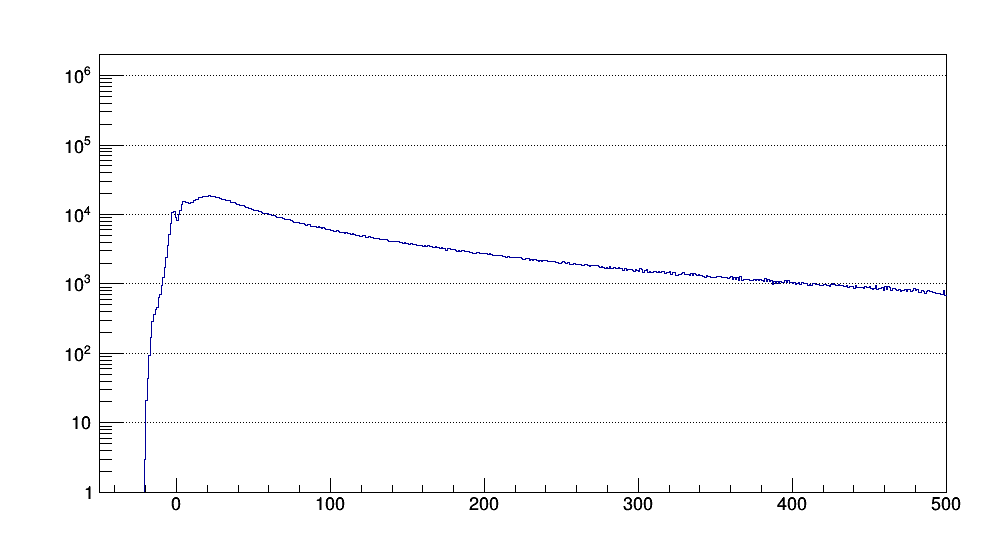

In [54]:
h = h_draw
h.GetXaxis().SetRangeUser(-30, 300)
h.GetYaxis().SetRangeUser(1, 2e6)
h.Draw()
C.Draw()

In [77]:
h_draw[('QGSP_BERT_HP', 22)].GetEntries()

7621458.0